In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## MODELING 
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
import warnings

In [62]:
df=pd.read_csv('data/stud.csv')

In [63]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [64]:
x = df.drop(columns=['math score'],axis=1)


In [65]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [66]:
y = df['math score']

In [67]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [68]:
##create column transformer with 3 types of transformers

num_features= x.select_dtypes(exclude="object").columns
cat_features= x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer,cat_features),
        ("StandardScaler", numeric_transformer,num_features),
    ]
)

In [69]:
x = preprocessor.fit_transform(x)



In [70]:
x.shape

(1000, 19)

In [71]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

In [72]:
def evaluate_model(true,predicted):
    mse= mean_squared_error(true,predicted)
    mae= mean_absolute_error(true,predicted)
    rmse=np.sqrt(mse)
    r2 = r2_score(true,predicted)
    return mae, rmse, r2

In [73]:
## model list

models = {
        "Linear Regression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "K-Neighbors Regressor" : KNeighborsRegressor(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest Regressor": RandomForestRegressor(),
        "XGBRegressor" : XGBRegressor(),
        "CatBoost Regressor": CatBoostRegressor(verbose=False),
        "AdaBoost Regressor": AdaBoostRegressor(),
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    ## Make predictions

    
    y_train_pred= model.predict(x_train)
    y_test_pred = model.predict(x_test)



    ## evaluate train and test ds

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))


    print('-----------Test Data--------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_mae))
    print("- Mean Absolute Error: {:.4f}".format(model_test_rmse))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
-----------Test Data--------
Model performance for Test set
- Root Mean Squared Error: 4.2148
- Mean Absolute Error: 5.3940
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
-----------Test Data--------
Model performance for Test set
- Root Mean Squared Error: 5.1579
- Mean Absolute Error: 6.5197
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
-----------Test Data--------
Model performance for Test set
- Root Mean Squared Error: 4.2111
- Mean Absolute Error: 5.3904
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7088
- Mean Absolute Error: 4.5177
- R2 Score: 0.8554
-----------Test Data--------
Model perfor

In [74]:
a=pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending = False)
a

,Model Name,R2_Score


In [75]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Model Name  0 non-null      object
 1   R2_Score    0 non-null      object
dtypes: object(2)
memory usage: 132.0+ bytes


In [76]:
## Linear Regression

lin_model= LinearRegression(fit_intercept=True)
lin_model= lin_model.fit(x_train, y_train)
y_pred= lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100

print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


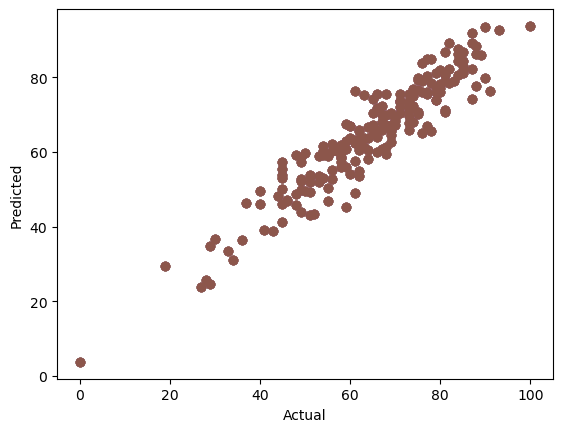

In [79]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()

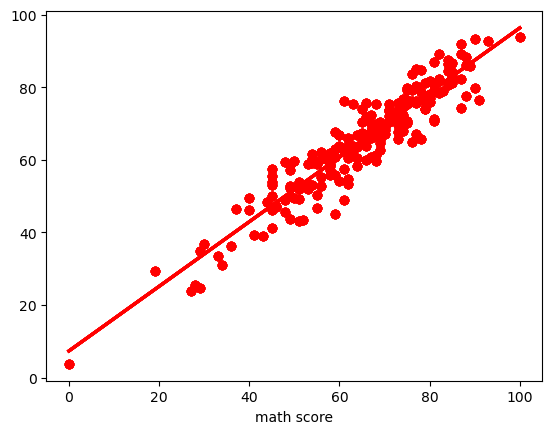

In [88]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');
plt.show()

In [94]:
## Diff between actual and predicated values

pred_df = pd.DataFrame({'Actual Value ': y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})

pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
